In [190]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [191]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [192]:
df.shape

(48842, 15)

### Cleaning

In [193]:
df.isnull().any()

age                False
workclass          False
fnlwgt             False
education          False
educational-num    False
marital-status     False
occupation         False
relationship       False
race               False
gender             False
capital-gain       False
capital-loss       False
hours-per-week     False
native-country     False
income             False
dtype: bool

the WorkClass ?

In [194]:
atr, count = np.unique(df['workclass'], return_counts = True)
most_atr = atr[np.argmax(count, axis = 0)]
df['workclass'][df['workclass'] == '?'] = most_atr


occupation ?

In [195]:
atr, count = np.unique(df["occupation"], return_counts=True)
most_atr = atr[np.argmax(count, axis=0)]
df["occupation"][df["occupation"] == '?'] = most_atr

native country


In [196]:
atr, count = np.unique(df["native-country"], return_counts=True)
most_atr = atr[np.argmax(count, axis=0)]
df["native-country"][df["native-country"] == '?'] = most_atr

#### converting incomes to value (mapping)


In [197]:
df["income"] = df["income"].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0


In [198]:
df.describe()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


# Graphs 

In [199]:
df['age'].value_counts()

36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

array([[<Axes: title={'center': 'age'}>]], dtype=object)

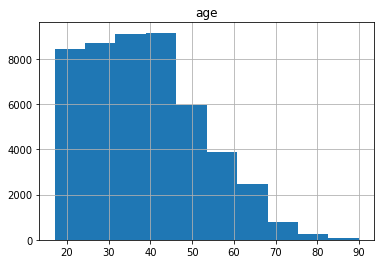

In [200]:
df.hist(column='age')

array([[<Axes: title={'center': 'hours-per-week'}>]], dtype=object)

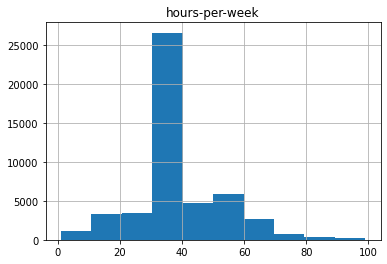

In [201]:
df.hist(column='hours-per-week')


<Axes: >

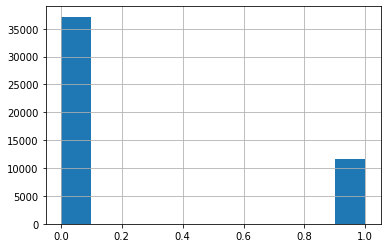

In [202]:
df["income"].hist()

<Axes: >

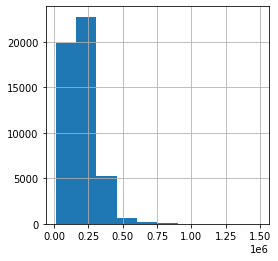

In [203]:
df['fnlwgt'].hist(figsize=(4,4))


<Axes: >

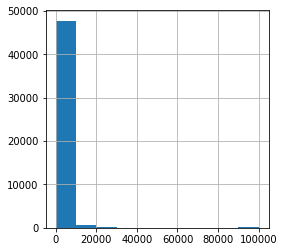

In [204]:
df["capital-gain"].hist(figsize=(4,4))


##  Learn

In [205]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

#### converting string to labels for normilization

In [206]:
df["workclass"] = pd.factorize(df['workclass'])[0] + 1
df["education"] = pd.factorize(df['education'])[0] + 1
df["occupation"] = pd.factorize(df['occupation'])[0] + 1
df["gender"] = pd.factorize(df['gender'])[0] + 1
df["race"] = pd.factorize(df['race'])[0] + 1
df["relationship"] = pd.factorize(df['relationship'])[0] + 1
df["native-country"] = pd.factorize(df['native-country'])[0] + 1
df["marital-status"] = pd.factorize(df['marital-status'])[0] + 1


In [207]:
X = df[['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]

X[0:2]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,1,226802,1,7,1,1,1,1,1,0,0,40,1
1,38,1,89814,2,9,2,2,2,2,1,0,0,50,1


In [208]:
y = df["income"].values
y[0:2]

array([0, 0], dtype=int64)

normilizing x


In [209]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:2]

array([[-0.99512893, -0.48948227,  0.35167453, -1.19012277, -1.19725891,
        -0.94953352, -1.81406896, -1.32467946, -1.97520347, -0.70422049,
        -0.14480353, -0.2171271 , -0.03408696, -0.23964294],
       [-0.04694151, -0.48948227, -0.94552415, -0.89938113, -0.41933527,
        -0.103174  , -1.48761181, -0.48562934,  0.03892839, -0.70422049,
        -0.14480353, -0.2171271 ,  0.77292975, -0.23964294]])

In [210]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain,ytest = train_test_split(X, y ,test_size=0.2, random_state=4)
Xtest[0:2]

array([[ 0.31774596,  0.26347962,  0.75820675, -0.89938113, -0.41933527,
         2.43590456, -0.50824035,  0.35342079,  0.03892839, -0.70422049,
        -0.14480353, -0.2171271 , -0.03408696, -0.23964294],
       [ 0.60949594,  2.52236531,  0.98721552, -0.89938113, -0.41933527,
        -0.103174  ,  0.14467395,  2.03152105,  0.03892839,  1.42000981,
        -0.14480353, -0.2171271 , -0.03408696, -0.23964294]])

# KNN CLASSIFIER


In [211]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(Xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [212]:
yhat = neigh.predict(Xtest)
yhat[0:2]

array([0, 1], dtype=int64)

In [213]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(ytrain, neigh.predict(Xtrain)))
print("Test set Accuracy: ", metrics.accuracy_score(ytest, yhat))

Train set Accuracy:  0.9000076779361708
Test set Accuracy:  0.8160507728529021


thats good isnt it?